## Lies `heights-weights.csv` in einen DataFrame

In [46]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler

df = pd.read_csv("data/heights-weights.csv")
df

,Height,Weight,Sex
0,179.227959,82.184853,male
1,161.272583,72.826430,female
2,163.369726,61.739943,female
3,156.540166,50.427042,female
4,155.050350,51.338797,female
...,...,...,...
9995,160.309698,65.892896,female
9996,176.081978,75.585614,female
9997,171.469924,77.832771,female
9998,161.473068,63.135486,female


## Visualisiere die Verteilung von `Height` getrennt nach `Sex`

<AxesSubplot: xlabel='Height', ylabel='Count'>

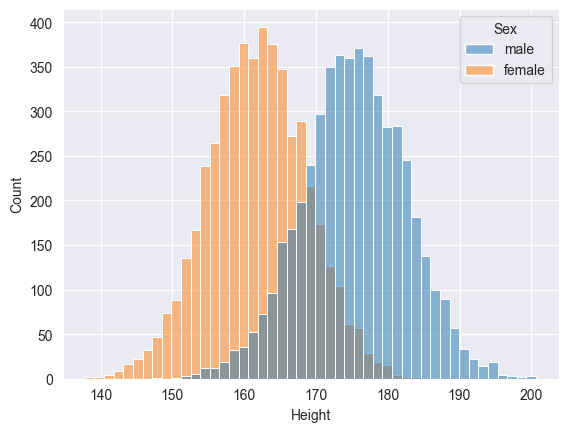

In [7]:
sns.histplot(data=df, x=df['Height'], hue=df['Sex'])

## Data Cleaning

Entferne alle `NaN` Werte folgendermaßen:
* entferne alle Observations, bei denen das Geschlecht unbekannt ist
* ergänze numerische Features mit einem Mittelwert des jeweiligen Geschlechts

In [43]:
def calc_error(model, X_test, y_true):
    predictions = model.predict(X_test)
    return np.sqrt(mean_squared_error(y_true, predictions))

In [34]:
df = df.dropna(subset="Sex")
imputer = SimpleImputer(strategy="mean")
df.Weight = imputer.fit_transform(df[['Weight']])
df.Height = imputer.fit_transform(df[['Height']])
df["isMale"] = df.Sex.replace({"male": 1, "female": 0})
df = df.drop(columns="Sex")

In [36]:
df.head()

,Height,Weight,isMale
0,179.227959,82.184853,1
1,161.272583,72.826430,0
2,163.369726,61.739943,0
3,156.540166,50.427042,0
4,155.050350,51.338797,0


## Training

* verwende 20% Testdaten und `random_state=42`
* predicte `Height`. Dabei sind zwei verschiedene Vorgangsweisen zu implementieren und zu vergleichen:
    1. mit Hilfe einer einfachen linearen Regression ist `Height` **nur** aus `Weight` zu predicten
    2. neben `Weight` ist auch `Sex` zu verwenden.

In [28]:
len(df)

9995

In [38]:

wX = df.drop(columns=["Height", "isMale"])
wy = df.Height

wX_train, wX_test, wy_train, wy_test = train_test_split(wX, wy, test_size=0.2, random_state=42)

X = df.drop(columns=["Height"])
y = df.Height

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
reg = LinearRegression()
reg.fit(wX_train, wy_train)
calc_error(reg, wX_test, wy_test)

3.8541924326299393

In [54]:
reg_sex = LinearRegression()
reg_sex.fit(X_train, y_train)
calc_error(reg_sex, X_test, y_test)

3.7837234795938155

## Evaluierung (nur das Modell mit beiden Features)

* Stelle die Verteilung der Fehler in einem `distplot` dar
* Predicte deine eigenen Daten

C:\Users\longb\AppData\Local\Temp\ipykernel_10820\3467164458.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(abs(y_test-predictions))


<AxesSubplot: xlabel='Height', ylabel='Density'>

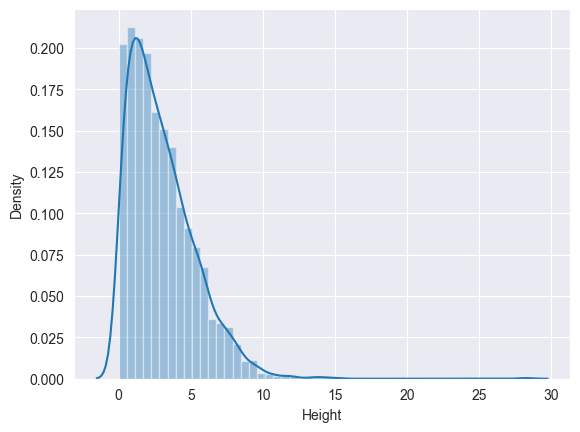

In [66]:
predictions = reg_sex.predict(X_test)
sns.distplot(abs(y_test-predictions))

In [65]:
me = pd.DataFrame(data=[
    [70,1]
], columns=X_train.columns)
reg_sex.predict(me)

array([165.46250903])